### Data Preparation for Bayesian Filter

install dependencies....

In [1]:
!pip install beautifulsoup4

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install wordcloud

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
#we are importing all the libraries we would like to use.
#including data stores for stopwords and such
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import os
import io
%matplotlib inline

### This function reads the files in the specified path.

In [4]:
def read_files(path):
    #this function is reading the actual email files.
    #the function will cycle through all the files in the folder specified.
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root,filename)
            
            inBody = False
            lines = []
            #this uses IO functions to read the files by specifying the encoding type
            f = io.open(path, 'r', encoding = 'latin1')
            #this cycles through each line and fetches the text therein.
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            #join the text into a single message.
            message = '\n'.join(lines)
            #return the message
            yield path, message
                    

### This function is for creating dataframes from the dataset in question... it also classifies the emails into either ham or spam

In [5]:
#this classifies the emails into spam or ham depending on predetermined status.
def dataFrameFromDirectory(path, classification):
    #instantiate the structure of the dataframe needed.
    rows = []
    index = []
    #store the message alongside its classification.
    for filename, message in read_files(path):
        rows.append({'message': message, 'label': classification})
        index.append(filename)
        #return the dataframe to be used for manipulation
    return pd.DataFrame(rows, index=index)

aggregate all the emails into a single dataframe. The key is: ham = 0, spam = 1

In [6]:
#fetch the data from the source files.
data = pd.DataFrame({'message':[],'label':[]})
data = data.append(dataFrameFromDirectory("datasets/ham2",0))
data = data.append(dataFrameFromDirectory("datasets/spam2",1))
data

,label,message
datasets/ham2\0004.e8d5727378ddde5c3be181df593f1712,0.0,Klez: The Virus That Won't Die\n\n \n\nAlready...
datasets/ham2\0005.8c3b9e9c0f3f183ddaf7592a11b99957,0.0,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot..."
datasets/ham2\0016.d82758030e304d41fb3f4ebbb7d9dd91,0.0,Yes - great minds think alike. But even withpu...
datasets/ham2\0017.d81093a2182fc9135df6d9158a8ebfd6,0.0,"On Mon, Aug 19, 2002 at 03:08:16PM +0100, John..."
datasets/ham2\0022.7241da4491c49b50c0470a3638ee35c4,0.0,In a nutshell - Solaris is Suns own flavour of...
datasets/ham2\0045.910fa2e79f96c646f1b6c987c65cbe3f,0.0,\n\n\n\n> From: fork-admin@xent.com [mailto:fo...
datasets/ham2\0047.5c3e049737a2813d4ac6f13f02362fb1,0.0,--==_Exmh_267413022P\n\nContent-Type: text/pla...
datasets/ham2\0050.fd9291b33ecd99af26da03a7d4152dc2,0.0,"\n\n>>>>> On Thu, 22 Aug 2002, ""Chris"" == Chri..."
datasets/ham2\0051.9281d3f8a3faf47d09a7fafdf2caf26e,0.0,Al white wrote:\n\n\n\n >erm... it runs Solari...
datasets/ham2\0057.be5e34dcebd922928045634015e3ed78,0.0,"At 17:10 22/08/2002 +0100, Nick Hilliard wrote..."


The below cell shows the number of rows in our dataframe.

In [7]:
total_mails = data['message'].shape[0]
total_mails

600

The function below extracts all text from html text present in all emails.

In [8]:
#this is for scraping the emails, since most are in the form of html based content.
from bs4 import BeautifulSoup

def func(df):
    soup = BeautifulSoup(df['message'], "html.parser").find()
    #check emails with html syntax
    if bool(soup):
        soup = BeautifulSoup(df['message'], "html.parser")
        #extract text only from the whole email.
    
        text = soup.find_all(text=True)
      
        #return all the words found.
        text = ''.join(word for word in  text)
        df['message'] = text
        
        return text
    else:
        
        return df['message'] 

In [63]:
import email

def using_emailing_function(df):

#     msg = email.message_from_string(df['message'])
#     for part in msg.walk():
#         print(df['message'])
        
    msg = email.message_from_string(df['message'])
    if msg.is_multipart():
        for payload in msg.get_payload():
            # if payload.is_multipart(): ...
#             print(payload.get_payload())
            soup = BeautifulSoup(payload.get_payload(), "lxml").find()
            if bool(soup):
                print(payload.get_payload())
            else:
                print(payload.get_payload())
    else:
        soup = BeautifulSoup(msg.get_payload(), "lxml").find()
        if bool(soup):
                print(msg.get_payload())
#         else:
#             print(msg.get_payload())



In [11]:
new_data = data.reset_index()
new_data

,index,label,message
0,datasets/ham2\0004.e8d5727378ddde5c3be181df593...,0.0,Klez: The Virus That Won't Die\n\n \n\nAlready...
1,datasets/ham2\0005.8c3b9e9c0f3f183ddaf7592a11b...,0.0,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot..."
2,datasets/ham2\0016.d82758030e304d41fb3f4ebbb7d...,0.0,Yes - great minds think alike. But even withpu...
3,datasets/ham2\0017.d81093a2182fc9135df6d9158a8...,0.0,"On Mon, Aug 19, 2002 at 03:08:16PM +0100, John..."
4,datasets/ham2\0022.7241da4491c49b50c0470a3638e...,0.0,In a nutshell - Solaris is Suns own flavour of...
5,datasets/ham2\0045.910fa2e79f96c646f1b6c987c65...,0.0,\n\n\n\n> From: fork-admin@xent.com [mailto:fo...
6,datasets/ham2\0047.5c3e049737a2813d4ac6f13f023...,0.0,--==_Exmh_267413022P\n\nContent-Type: text/pla...
7,datasets/ham2\0050.fd9291b33ecd99af26da03a7d41...,0.0,"\n\n>>>>> On Thu, 22 Aug 2002, ""Chris"" == Chri..."
8,datasets/ham2\0051.9281d3f8a3faf47d09a7fafdf2c...,0.0,Al white wrote:\n\n\n\n >erm... it runs Solari...
9,datasets/ham2\0057.be5e34dcebd922928045634015e...,0.0,"At 17:10 22/08/2002 +0100, Nick Hilliard wrote..."


In [12]:
new_data[new_data['message'].str.isalnum()]

,index,label,message


split the data into the pareto principle for unbiased model testing.
so 80% will be used for training and 20% for testing.
this will be accomplished by using a random number generator to randomize the order by implementing a uniform distribution randomizer. this removes all chances of having a biased model on account of sequential data.

In [13]:
#split the data into training and testing sets
#initializing empty lists to hold training and testing data respectively
train_index, test_index = list(), list()
for i in range(data['message'].shape[0]):
    #make use of the uniform random distribution to alleviate contiguousness of pseudo-random number generators.
    #80% for training and 20% for testing according to the pareto principle.
    if np.random.uniform(0,1) < 0.80:
        train_index.append(i)
    else:
        test_index.append(i)
#training data dataframe.
train_data = new_data.loc[train_index]
#test data dataframe
test_data = new_data.loc[test_index]

In [64]:
train_data.apply(using_emailing_function, axis = 1)

 

Already the most prolific virus ever, Klez continues to wreak havoc.



Andrew Brandt

>>From the September 2002 issue of PC World magazine

Posted Thursday, August 01, 2002





The Klez worm is approaching its seventh month of wriggling across 

the Web, making it one of the most persistent viruses ever. And 

experts warn that it may be a harbinger of new viruses that use a 

combination of pernicious approaches to go from PC to PC.



Antivirus software makers Symantec and McAfee both report more than 

2000 new infections daily, with no sign of letup at press time. The 

British security firm MessageLabs estimates that 1 in every 300 

e-mail messages holds a variation of the Klez virus, and says that 

Klez has already surpassed last summer's SirCam as the most prolific 

virus ever.



And some newer Klez variants aren't merely nuisances--they can carry 

other viruses in them that corrupt your data.



...



http://www.pcworld.com/news/article/0,aid,103259,00.asp

_________

0      None
1      None
3      None
5      None
6      None
7      None
8      None
9      None
10     None
12     None
13     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
25     None
26     None
27     None
28     None
29     None
30     None
34     None
35     None
36     None
37     None
       ... 
560    None
561    None
562    None
564    None
567    None
568    None
569    None
570    None
571    None
572    None
573    None
576    None
577    None
578    None
580    None
581    None
583    None
584    None
585    None
586    None
587    None
588    None
589    None
590    None
591    None
592    None
593    None
595    None
596    None
598    None
Length: 485, dtype: object

implement the data cleaning of the html based messages
    

In [12]:
#here we  apply the scraping function to our data. hence cleaning it.
train_data['message'] = train_data.apply(func, axis=1)
test_data['message'] = test_data.apply(func, axis=1)
train_data

C:\Users\ikangethe.MO-DE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5.asp






" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


,index,label,message
0,datasets/ham2\0004.e8d5727378ddde5c3be181df593...,0.0,Klez: The Virus That Won't Die\n\n \n\nAlready...
1,datasets/ham2\0005.8c3b9e9c0f3f183ddaf7592a11b...,0.0,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot..."
2,datasets/ham2\0016.d82758030e304d41fb3f4ebbb7d...,0.0,Yes - great minds think alike. But even withpu...
3,datasets/ham2\0017.d81093a2182fc9135df6d9158a8...,0.0,"On Mon, Aug 19, 2002 at 03:08:16PM +0100, John..."
4,datasets/ham2\0022.7241da4491c49b50c0470a3638e...,0.0,In a nutshell - Solaris is Suns own flavour of...
5,datasets/ham2\0045.910fa2e79f96c646f1b6c987c65...,0.0,\n\n\n\n> From: fork-admin@xent.com [mailto:fo...
8,datasets/ham2\0051.9281d3f8a3faf47d09a7fafdf2c...,0.0,Al white wrote:\n\n\n\n >erm... it runs Solari...
9,datasets/ham2\0057.be5e34dcebd922928045634015e...,0.0,"At 17:10 22/08/2002 +0100, Nick Hilliard wrote..."
12,datasets/ham2\0071.75403094cab986a246c1e7ce346...,0.0,">>>>> ""E"" == Eirikur Hallgrimsson writes:\n\n..."
13,datasets/ham2\0074.78000652dcb19856e85ff9637f0...,0.0,Is there a way to look for a particular file o...


In [24]:
import re

train_data['message'] = train_data['message'].map(lambda x: re.sub(r'\W+', ' ', x))
test_data['message'] = test_data['message'].map(lambda x: re.sub(r'\W+', ' ', x))

In [14]:
train_data['message'].str.isalnum()

0      False
1      False
2      False
3      False
4      False
5      False
8      False
9      False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
26     False
27     False
28     False
30     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
       ...  
560    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
569    False
570    False
572    False
573    False
575    False
576    False
577    False
579    False
580    False
583    False
584    False
585    False
586    False
587    False
588    False
589    False
591    False
592    False
594    False
596    False
597    False
598    False
Name: message, Length: 477, dtype: bool

In [15]:
test_data

,index,label,message
6,datasets/ham2\0047.5c3e049737a2813d4ac6f13f023...,0.0,_Exmh_267413022P Content Type text plain char...
7,datasets/ham2\0050.fd9291b33ecd99af26da03a7d41...,0.0,On Thu 22 Aug 2002 Chris Chris Garrigues wrot...
10,datasets/ham2\0069.7173de1d2da14306c5a20e8abda...,0.0,Once upon a time Joshua wrote Just a thought w...
11,datasets/ham2\0070.4f269f2d783b479971f31006fe1...,0.0,It will function as a router if that is what y...
23,datasets/ham2\0145.7400cf6ab4cfe5ffeaab582c973...,0.0,On Sun Oct 06 2002 at 11 10 05PM 0100 Declan d...
24,datasets/ham2\0147.16b764c5bd3e419cc5b6d0145b2...,0.0,Original Message From Scott Wood To Sent Mond...
25,datasets/ham2\0149.d59bb0d23ca8ad3a87e549d3e61...,0.0,http www washingtonpost com wp dyn articles A4...
29,datasets/ham2\0165.60d0c03c63a588f58ca91b79161...,0.0,Helen Mike wrote Chat tends to be on irc quak...
31,datasets/ham2\0169.b19a689237947db7b9e244277e0...,0.0,Hi I try to rebuild xine from src package and ...
45,datasets/ham2\0216.d46ac2cc3fa5d42e1a9b7d8b433...,0.0,David asked My wife noticed something odd The...


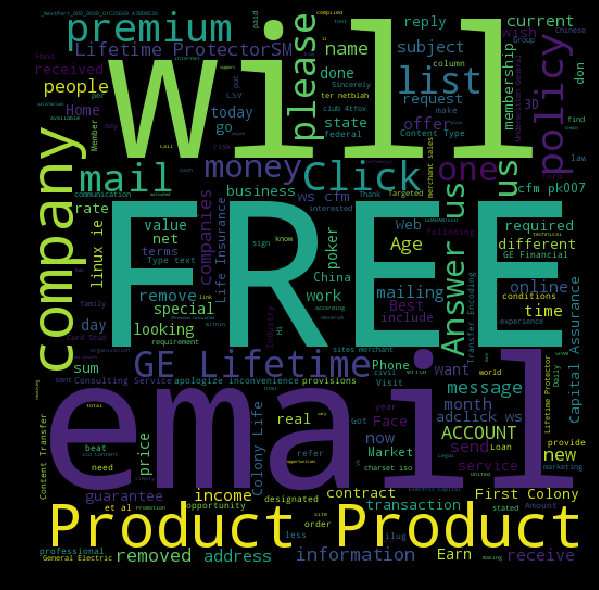

In [16]:
#visual representation of the most salient words.
#this is the visulization for the spam.
spam_words = ' '.join(str(moja) for moja in list(test_data[test_data['label'] == 1]['message']))
spamwc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spamwc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

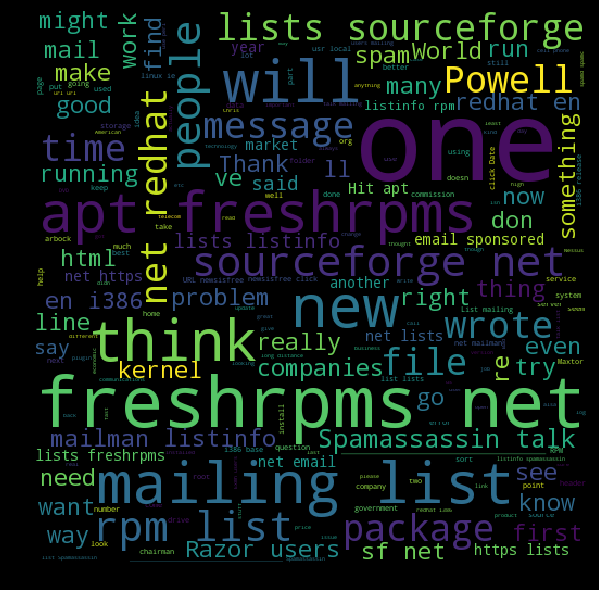

In [17]:
#Visualize the ham data
spam_words = ' '.join(str(moja) for moja in list(test_data[test_data['label'] == 0]['message']))
spamwc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spamwc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

distribution by value

In [18]:
train_data['label'].value_counts()

0.0    395
1.0     82
Name: label, dtype: int64

in this cell we preprocess the text to be able to be fit into the model.
the first step is to first make all the text lower case for uniformity.
Then we tokenize each message in the dataset.
Tokenization  is the task of splitting up a message into pieces and throwing away the punctuation characters.
The words like ‘go’, ‘goes’, ‘going’ indicate the same activity. We can replace all these words by a single word ‘go’. This is called stemming. We are going to use Porter Stemmer, which is a famous stemming algorithm.

In [19]:
#tokenizing and processing the words harnessed.
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    #lower case all the letters in the message.
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
#     print(words)
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
#     print(words)
    return words

In [20]:
train_data.columns

Index(['index', 'label', 'message'], dtype='object')

In [21]:
class SpamClassifier(object):
    def __init__(self, train_data, method = 'tf-idf'):
        self.mails, self.labels = train_data['message'], train_data['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        self.missing_index = [number for number in range(0,noOfMessages) if number not in self.mails.index ]
        for i in range(noOfMessages):
            if i not in self.missing_index:
                message_processed = process_message(self.mails[i])
                count = list() #To keep track of whether the word has ocured in the message or not.
                               #For IDF
                for word in message_processed:
                    if self.labels[i]:
                        self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                        self.spam_words += 1
                    else:
                        self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                        self.ham_words += 1
                    if word not in count:
                        count += [word]
                for word in count:
                    if self.labels[i]:
                        self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                    else:
                        self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            print(processed_message)
            result[i] = int(self.classify(processed_message))
        return result

In [22]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [25]:
sc_bow = SpamClassifier(train_data, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(test_data['message'])
metrics(test_data['label'], preds_bow)

['_exmh_267413022p content', 'content type', 'type text', 'text plain', 'plain charset', 'charset ascii', 'ascii from', 'from anders', 'anders eriksson', 'eriksson date', 'date thu', 'thu aug', 'aug 2002', '2002 0200', '0200 oooops', 'oooops doesn', 'doesn work', 'work all', 'all got', 'got this', 'this startup', 'startup and', 'and any', 'any attempt', 'attempt change', 'change folde', 'folde which', 'which fail', 'fail sigh', 'sigh already', 'already found', 'found that', 'that and', 'and checked', 'checked apparently', 'apparently did', 'did after', 'after you', 'you checked', 'checked out', 'out and', 'and before', 'before you', 'you sent', 'sent this', 'this mail', 'mail hoped', 'hoped was', 'was fast', 'fast enough', 'enough that', 'that you', 'you wouldn', 'wouldn see', 'see try', 'try again', 'again chris', 'chris chris', 'chris garrigues', 'garrigues http', 'http www', 'www deepeddy', 'deepeddy com', 'com cwg', 'cwg vircio', 'vircio http', 'http www', 'www vircio', 'vircio com

ValueError: math domain error

In [26]:
sc_tf_idf = SpamClassifier(train_data, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(test_data['message'])
metrics(test_data['label'], preds_tf_idf)


['_exmh_267413022p content', 'content type', 'type text', 'text plain', 'plain charset', 'charset ascii', 'ascii from', 'from anders', 'anders eriksson', 'eriksson date', 'date thu', 'thu aug', 'aug 2002', '2002 0200', '0200 oooops', 'oooops doesn', 'doesn work', 'work all', 'all got', 'got this', 'this startup', 'startup and', 'and any', 'any attempt', 'attempt change', 'change folde', 'folde which', 'which fail', 'fail sigh', 'sigh already', 'already found', 'found that', 'that and', 'and checked', 'checked apparently', 'apparently did', 'did after', 'after you', 'you checked', 'checked out', 'out and', 'and before', 'before you', 'you sent', 'sent this', 'this mail', 'mail hoped', 'hoped was', 'was fast', 'fast enough', 'enough that', 'that you', 'you wouldn', 'wouldn see', 'see try', 'try again', 'again chris', 'chris chris', 'chris garrigues', 'garrigues http', 'http www', 'www deepeddy', 'deepeddy com', 'com cwg', 'cwg vircio', 'vircio http', 'http www', 'www vircio', 'vircio com

ValueError: math domain error

In [ ]:
pm = process_message('I cant pick the phone right now. Pls send a message')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('Congratulations ur awarded $500 ')
sc_tf_idf.classify(pm)

In [ ]:
train_data.reset_index(drop=True)

In [ ]:
-